In [1]:
#Install Packages

#pip install openpyxl
#pip install pandas
#pip install matplotlib
#pip install scipy
#pip install simplejson

In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import datetime
import json
import pickle
import matplotlib.pyplot as plt

In [3]:
# Load variables from the DataAnalysis file

with open('RT_DataAnalysisVariables.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
# Load variables from the Global_Variables file

with open('Global_Variables.pkl', 'rb') as f:
    Global_Variables = pickle.load(f)

In [5]:
#Assumptions from CHE Report

#BTC Mining
#Basis_MW = data['Basis_MW'] #MW
#Hardware_Eff = data['Hardware_Eff'] #Percentage
#W_from_Renewables = data['W_from_Renewables'] #GW
#P_from_Renewables = data['P_from_Renewables'] #GW
#P_from_Solar = data['P_from_Solar']
#Solar_Surplus = data['Solar_Surplus'] #Percentage of excess energy produced by Solar Energy
#Solar_Plant_W = data['Solar_Plant_W'] #GW

#Solar Plant
#PV_Capacity = data['PV_Capacity'] #MW Maximum capacity
#Capital_Cost_PV = data['Capital_Cost_PV'] #$/MW
#PV_Plant_Cost = data['PV_Plant_Cost'] #$

#Calculations based on Assumptions
#W_from_Solar = data['W_from_Solar']
#Global_W = data['Global_W']

#Date of data extraction from Blockchain.com
last_date = Global_Variables['last_date']

In [6]:
#Calculated in Data Analysis file
NumberofRigsPerModel = data['NumberofRigsPerModel']
df_PV = data['df_PV_copy']

In [7]:
#Data used as basis
Crypto_Data = Global_Variables['Crypto_Data']
ASIC_df = Crypto_Data

#Bitcoin Data
hashrate_BTC = Global_Variables['hashrate_BTC']
revenue_BTC = Global_Variables['revenue_BTC']

#JSON file paths
file_paths = [hashrate_BTC,revenue_BTC]

In [8]:
#Considering that 
ASIC_df['NumberOfRigs'] = ASIC_df['Model'].map(NumberofRigsPerModel)

ASIC_df['Total Hashrate (Th/s)'] = ASIC_df['Hashrate (Th/s)']*ASIC_df['NumberOfRigs']

#Once off
ASIC_df['CapitalCost (000 $)'] = ASIC_df['NumberOfRigs']*ASIC_df['Price ($)']/1000

ASIC_df = ASIC_df[ASIC_df['Rig Type'] != 'ASIC']


ASIC_df.head()

,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $)
12,Core i7 950,2009,0.000019,157.50,SHA-256,NaN,NaN,NaN,NaN,NaN,70.0,NaN,None,None,NaN,CPU,1354498.0,25.735462,94814.860
13,Atom N450,2009,0.000100,322.58,SHA-256,NaN,NaN,NaN,NaN,NaN,15.0,NaN,None,None,NaN,CPU,661335.0,66.133500,9920.025
14,ATI 4850,2010,0.000101,109.78,SHA-256,NaN,NaN,NaN,NaN,NaN,90.0,NaN,None,None,NaN,GPU,1943281.0,196.271381,174895.290
15,ATI 5770,2010,0.000215,110.00,SHA-256,NaN,NaN,NaN,NaN,NaN,30.0,NaN,None,None,NaN,GPU,1939394.0,416.969710,58181.820
16,The Single,2011,0.000832,80.00,SHA-256,NaN,NaN,NaN,NaN,NaN,795.0,NaN,None,None,NaN,FPGA,2666667.0,2218.666944,2120000.265


In [9]:
ASIC_df.columns

Index(['Model', 'Release', 'Hashrate (Th/s)', 'Power (W)', 'Algorithm',
       'Income ($/day)', 'Electricity Cost ($/day)', 'With Electricity',
       'Without Electricity', 'Efficiency (j/Gh)', 'Price ($)', 'Noise db',
       'Cooling', 'Seller', 'Days to Breakeven', 'Rig Type', 'NumberOfRigs',
       'Total Hashrate (Th/s)', 'CapitalCost (000 $)'],
      dtype='object')

In [10]:
temp_ASIC_df = ASIC_df.copy()

In [11]:
old_column_names = ['Release', 'Hashrate (Th/s)', 'Power (W)', 'Algorithm',
       'Income ($/day)', 'Electricity Cost ($/day)',
       'With Electricity', 'Without Electricity',
       'Efficiency (j/Gh)', 'Price ($)', 'Noise db', 'Cooling', 'Seller',
       'Days to Breakeven', 'NumberOfRigs',
       'Total Hashrate (Th/s)', 'CapitalCost (000 $)']

new_column_names = ['Release', 'Hashrate(Th/s)','Power(W)','Algorithm',
        'Income($/day)','ElectricityCost($/day)',
        'WithElectricity','WithoutElectricity',
        'Efficiency(j/Gh)','Price($)','Noisedb','Cooling','Seller',
        'DaystoBreakeven','NumberOfRigs',
        'TotalHashrate(Th/s)','CapitalCost(000)']

In [12]:
temp_ASIC_df[new_column_names] = temp_ASIC_df[old_column_names]

dicts = {}

for col in new_column_names:
    dict_name = f"dict_{col}"
    dicts[dict_name] = temp_ASIC_df.set_index('Model')[col].to_dict()

for name, dictionary in dicts.items():
    print(f"{name} -> {dictionary}")


dict_Release -> {'Core i7 950': '2009', 'Atom N450': '2009', 'ATI 4850': '2010', 'ATI 5770': '2010', 'The Single': '2011', 'Rig Box': '2011'}
dict_Hashrate(Th/s) -> {'Core i7 950': 1.9e-05, 'Atom N450': 0.0001, 'ATI 4850': 0.000101, 'ATI 5770': 0.000215, 'The Single': 0.000832, 'Rig Box': 0.05}
dict_Power(W) -> {'Core i7 950': 157.5, 'Atom N450': 322.58, 'ATI 4850': 109.78, 'ATI 5770': 110.0, 'The Single': 80.0, 'Rig Box': 2450.98}
dict_Algorithm -> {'Core i7 950': 'SHA-256', 'Atom N450': 'SHA-256', 'ATI 4850': 'SHA-256', 'ATI 5770': 'SHA-256', 'The Single': 'SHA-256', 'Rig Box': 'SHA-256'}
dict_Income($/day) -> {'Core i7 950': nan, 'Atom N450': nan, 'ATI 4850': nan, 'ATI 5770': nan, 'The Single': nan, 'Rig Box': nan}
dict_ElectricityCost($/day) -> {'Core i7 950': nan, 'Atom N450': nan, 'ATI 4850': nan, 'ATI 5770': nan, 'The Single': nan, 'Rig Box': nan}
dict_WithElectricity -> {'Core i7 950': nan, 'Atom N450': nan, 'ATI 4850': nan, 'ATI 5770': nan, 'The Single': nan, 'Rig Box': nan}
d

In [13]:
#Function to read JSON files
def read_and_print_json(file_path):

    with open(file_path, 'r') as file:
        json_data = json.load(file)

    print(json_data)
    
    return json_data

In [14]:
#Function to convert json data to Dataframe
def process_data(category_y,category_x,json_data):
    time_series_data = json_data[category_y]

    df = pd.DataFrame(time_series_data)
    df[category_x] = df['x']
    df[category_y] = df['y']
    return df

In [15]:
#Function to add column with dates to the data
def add_dates(df,last_date):

    num_rows = df.shape[0]
    dates = pd.date_range(end=last_date, periods=num_rows)
    df['Date'] = dates

    return df

In [16]:
#Function to plot graphs for data visualization
def plot_graph(df,y_data,title,y_label):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    x = df['Date']
    y = df[y_data]

    plt.plot(x, y,label=y_data, color='red')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()


{'metric1': 'miners-revenue', 'metric2': 'market-price', 'miners-revenue': [{'x': 1698451200000, 'y': 31018704.384994347}, {'x': 1698537600000, 'y': 31869663.034045357}, {'x': 1698624000000, 'y': 32053239.592004847}, {'x': 1698710400000, 'y': 32663988.681133866}, {'x': 1698796800000, 'y': 33441948.513665527}, {'x': 1698883200000, 'y': 33470161.096744664}, {'x': 1698969600000, 'y': 33484481.368150137}, {'x': 1699056000000, 'y': 32987416.154812064}, {'x': 1699142400000, 'y': 33831315.08251717}, {'x': 1699228800000, 'y': 34970491.281359695}, {'x': 1699315200000, 'y': 34304247.065032534}, {'x': 1699401600000, 'y': 34048475.964370735}, {'x': 1699488000000, 'y': 34650644.88509359}, {'x': 1699574400000, 'y': 35941397.8715662}, {'x': 1699660800000, 'y': 37521879.87848707}, {'x': 1699747200000, 'y': 37752398.46864532}, {'x': 1699833600000, 'y': 38600137.92737014}, {'x': 1699920000000, 'y': 38808396.61609398}, {'x': 1700006400000, 'y': 39203968.35652012}, {'x': 1700092800000, 'y': 39445757.50334

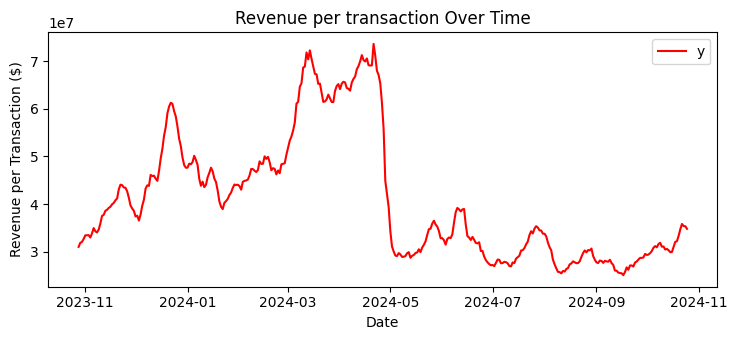

In [17]:
#Daily transaction_revenue to BTC miners across the globe
file_path = revenue_BTC
json_data = read_and_print_json(file_path)

category_y = 'miners-revenue'
category_x = 'Revenue (USD)'
df_revenue = process_data(category_y,category_x,json_data)

df_revenue = add_dates(df_revenue,last_date)

print(df_revenue.head())

y_data = 'y'
title = 'Revenue per transaction Over Time'
y_label = 'Revenue per Transaction ($)'
plot_graph(df_revenue,y_data,title,y_label)

{'metric1': 'hash-rate', 'metric2': 'market-price', 'hash-rate': [{'x': 1698451200000, 'y': 448143230.48629}, {'x': 1698537600000, 'y': 452477304.2820955}, {'x': 1698624000000, 'y': 445542786.2088067}, {'x': 1698710400000, 'y': 446432116.97122365}, {'x': 1698796800000, 'y': 460578041.84067196}, {'x': 1698883200000, 'y': 464261140.1474795}, {'x': 1698969600000, 'y': 463125882.7349779}, {'x': 1699056000000, 'y': 456708337.497233}, {'x': 1699142400000, 'y': 461884981.20968944}, {'x': 1699228800000, 'y': 474812083.2106728}, {'x': 1699315200000, 'y': 462212744.476483}, {'x': 1699401600000, 'y': 452453934.13244975}, {'x': 1699488000000, 'y': 452453934.13244975}, {'x': 1699574400000, 'y': 452010351.8440846}, {'x': 1699660800000, 'y': 459994833.0346573}, {'x': 1699747200000, 'y': 456446174.72773606}, {'x': 1699833600000, 'y': 456439922.31436163}, {'x': 1699920000000, 'y': 455681828.07999325}, {'x': 1700006400000, 'y': 460070558.7815174}, {'x': 1700092800000, 'y': 461955101.49630696}, {'x': 170

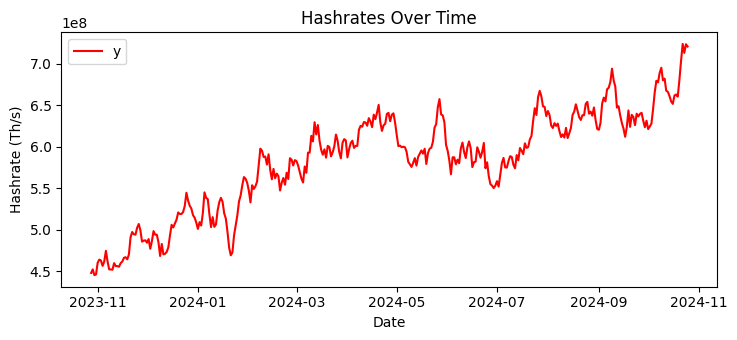

In [18]:
#Daily hasrates to BTC miners across the globe
file_path = hashrate_BTC
json_data = read_and_print_json(file_path)

category_y = 'hash-rate'
category_x = 'Revenue (USD)'
df_hr = process_data(category_y,category_x,json_data)

df_hr = add_dates(df_hr,last_date)

print(df_hr.head())

y_data = 'y'
title = 'Hashrates Over Time'
y_label = 'Hashrate (Th/s)'
plot_graph(df_hr,y_data,title,y_label)

In [19]:
#hash-rate in Th/s
#miners-revenue in USD

df = pd.merge(df_hr[['Date', 'hash-rate']], df_revenue[['Date', 'miners-revenue']], on='Date', how='inner')

df.head()


,Date,hash-rate,miners-revenue
0,2023-10-28,4.481432e+08,3.101870e+07
1,2023-10-29,4.524773e+08,3.186966e+07
2,2023-10-30,4.455428e+08,3.205324e+07
3,2023-10-31,4.464321e+08,3.266399e+07
4,2023-11-01,4.605780e+08,3.344195e+07


In [20]:
df.tail()

,Date,hash-rate,miners-revenue
359,2024-10-21,7.027137e+08,3.471964e+07
360,2024-10-22,7.236317e+08,3.583560e+07
361,2024-10-23,7.128173e+08,3.537913e+07
362,2024-10-24,7.232393e+08,3.535770e+07
363,2024-10-25,7.204847e+08,3.481178e+07


In [21]:
df['revenue per hashrate'] = df['miners-revenue'] /df['hash-rate']
df.head()

,Date,hash-rate,miners-revenue,revenue per hashrate
0,2023-10-28,4.481432e+08,3.101870e+07,0.069216
1,2023-10-29,4.524773e+08,3.186966e+07,0.070434
2,2023-10-30,4.455428e+08,3.205324e+07,0.071942
3,2023-10-31,4.464321e+08,3.266399e+07,0.073167
4,2023-11-01,4.605780e+08,3.344195e+07,0.072609


In [22]:
df_PV.head()

,Date,Hour,Energy for Mining (MW),Month,Core i7 950,Atom N450,ATI 4850,ATI 5770,The Single,Rig Box
0,2024-01-01,0,0.0,1,0,0,0,0,0,0
1,2024-01-01,1,0.0,1,0,0,0,0,0,0
2,2024-01-01,2,0.0,1,0,0,0,0,0,0
3,2024-01-01,3,0.0,1,0,0,0,0,0,0
4,2024-01-01,4,0.0,1,0,0,0,0,0,0


In [23]:

# Read the dictionary dict_Hashrate
dict_Hashrate = dicts['dict_Hashrate(Th/s)']

# Multiple the hashrate of each model by the corresponding column in df_PV
for column in df_PV.columns:
    if column in dict_Hashrate: 
        df_PV[column] = df_PV[column] * dict_Hashrate[column]

# Assume that hourly 'revenue per hashrate' stays constant per hour
df_new = df.copy()
df_new['revenue per hashrate'] = df_new['revenue per hashrate']/24

# Merge both dataframes on 'Date'
merged_df = df_PV.merge(df_new[['Date', 'revenue per hashrate']], on='Date', how='left')


# Multiply each column (excluding 'Date' and 'revenue per hashrate') by 'revenue per hashrate'
for column in merged_df.columns:
    if column not in ['Date', 'revenue per hashrate']:
        merged_df[column] = merged_df[column] * merged_df['revenue per hashrate']

# Sum up all the daily revenues per model
merged_df["Date"] = pd.to_datetime(merged_df["Date"])
merged_df = merged_df.groupby("Date", as_index=False).sum()

df = merged_df.copy()
df.head()

,Date,Hour,Energy for Mining (MW),Month,Core i7 950,Atom N450,ATI 4850,ATI 5770,The Single,Rig Box,revenue per hashrate
0,2024-01-01,1.093477,4.982027,0.095085,0.601007,1.544432,4.583575,9.737600,51.813097,101.634545,0.095085
1,2024-01-02,1.094810,4.972377,0.095201,0.599843,1.541442,4.574697,9.718741,51.712733,101.437153,0.095201
2,2024-01-03,1.100711,5.288484,0.095714,0.637976,1.639435,4.865523,10.336587,55.000256,107.885866,0.095714
3,2024-01-04,1.079306,5.070484,0.093853,0.611678,1.571855,4.664957,9.910494,52.733047,103.438970,0.093853
4,2024-01-05,1.057781,5.064103,0.091981,0.610908,1.569877,4.659087,9.898024,52.666686,103.308832,0.091981


In [24]:
model_sums = {model: df[model].sum() for model in dict_Hashrate.keys()}

Yearly_revenue_perModel = pd.DataFrame(list(model_sums.items()), columns=['Model', 'Annual_Sum'])

Yearly_revenue_perModel.head()


,Model,Annual_Sum
0,Core i7 950,89.113705
1,Atom N450,228.999382
2,ATI 4850,679.625244
3,ATI 5770,1443.833559
4,The Single,7682.536644


In [25]:
ASIC_df.head(3)

,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $)
12,Core i7 950,2009,0.000019,157.50,SHA-256,NaN,NaN,NaN,NaN,NaN,70.0,NaN,None,None,NaN,CPU,1354498.0,25.735462,94814.860
13,Atom N450,2009,0.000100,322.58,SHA-256,NaN,NaN,NaN,NaN,NaN,15.0,NaN,None,None,NaN,CPU,661335.0,66.133500,9920.025
14,ATI 4850,2010,0.000101,109.78,SHA-256,NaN,NaN,NaN,NaN,NaN,90.0,NaN,None,None,NaN,GPU,1943281.0,196.271381,174895.290


In [26]:
dict_CapitalCost= dicts['dict_CapitalCost(000)']

In [27]:
Yearly_revenue_perModel['Capital_Cost ($000)'] = Yearly_revenue_perModel['Model'].map(dict_CapitalCost)
Yearly_revenue_perModel['Capital_Cost'] = Yearly_revenue_perModel['Capital_Cost ($000)']*1000

Yearly_revenue_perModel['Payback_Period'] = Yearly_revenue_perModel['Capital_Cost']/Yearly_revenue_perModel['Annual_Sum']
Yearly_revenue_perModel.head()

,Model,Annual_Sum,Capital_Cost ($000),Capital_Cost,Payback_Period
0,Core i7 950,89.113705,94814.860,9.481486e+07,1.063976e+06
1,Atom N450,228.999382,9920.025,9.920025e+06,4.331900e+04
2,ATI 4850,679.625244,174895.290,1.748953e+08,2.573408e+05
3,ATI 5770,1443.833559,58181.820,5.818182e+07,4.029676e+04
4,The Single,7682.536644,2120000.265,2.120000e+09,2.759506e+05


In [28]:
ASIC_df = ASIC_df.merge(Yearly_revenue_perModel[['Model', 'Payback_Period']], on='Model')
ASIC_df.head()


,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $),Payback_Period
0,Core i7 950,2009,0.000019,157.50,SHA-256,NaN,NaN,NaN,NaN,NaN,70.0,NaN,None,None,NaN,CPU,1354498.0,25.735462,94814.860,1.063976e+06
1,Atom N450,2009,0.000100,322.58,SHA-256,NaN,NaN,NaN,NaN,NaN,15.0,NaN,None,None,NaN,CPU,661335.0,66.133500,9920.025,4.331900e+04
2,ATI 4850,2010,0.000101,109.78,SHA-256,NaN,NaN,NaN,NaN,NaN,90.0,NaN,None,None,NaN,GPU,1943281.0,196.271381,174895.290,2.573408e+05
3,ATI 5770,2010,0.000215,110.00,SHA-256,NaN,NaN,NaN,NaN,NaN,30.0,NaN,None,None,NaN,GPU,1939394.0,416.969710,58181.820,4.029676e+04
4,The Single,2011,0.000832,80.00,SHA-256,NaN,NaN,NaN,NaN,NaN,795.0,NaN,None,None,NaN,FPGA,2666667.0,2218.666944,2120000.265,2.759506e+05


In [29]:
# Identify the model with the minimum payback period
min_payback_idx = ASIC_df['Payback_Period'].idxmin()
min_payback_row = ASIC_df.loc[min_payback_idx]

min_payback_model = min_payback_row['Model']
min_payback_value = min_payback_row['Payback_Period']
min_payback_releasedate = min_payback_row['Release']

# Display the model with the minimum payback period and its value
print(f"Model with minimum payback period: {min_payback_model}")
print(f"Release Date of Model with minimum payback period: {min_payback_releasedate}")
print(f"Minimum payback period: {min_payback_value}")

Model with minimum payback period: Rig Box
Release Date of Model with minimum payback period: 2011
Minimum payback period: 519.828766387636


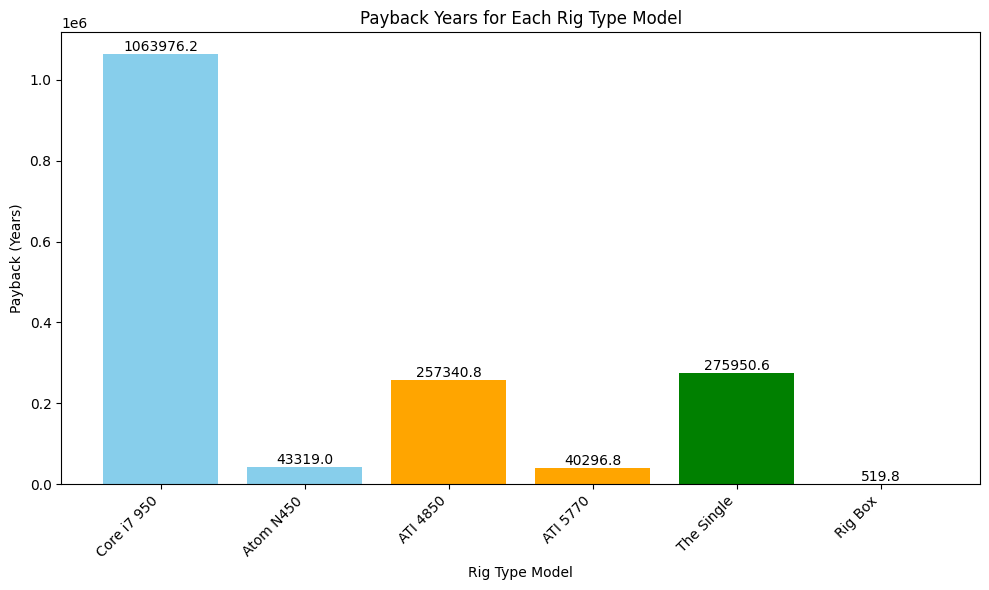

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_payback_period_by_release_with_groups(
    df, 
    release_column='Release', 
    model_column='Model', 
    payback_column='Payback_Period',
    model_groups=None
):
    """
    Plot payback years for each model ordered by release date, with specified model groups having the same color.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing model, release date, and payback period data.
        release_column (str): The name of the column with release dates.
        model_column (str): The name of the column with model names.
        payback_column (str): The name of the column with payback period values.
        model_groups (dict): A dictionary where keys are group names and values are lists of model names that should have the same color.
        
    Returns:
        None: Displays a bar chart of payback years for each model.
    """
    # Ensure the release column is in datetime format
    df[release_column] = pd.to_datetime(df[release_column])

    # Sort the DataFrame by release date
    df_sorted = df.sort_values(by=release_column)

    # Define colors based on model groups
    color_palette = ['skyblue', 'orange', 'green', 'purple', 'blue', 'pink']
    color_map = {}
    
    if model_groups:
        for idx, (group, models) in enumerate(model_groups.items()):
            for model in models:
                color_map[model] = color_palette[idx % len(color_palette)]

    # Assign colors, using default if model not in groups
    colors = [color_map.get(model, 'grey') for model in df_sorted[model_column]]
    
    # Highlight the minimum payback period model
    min_payback_idx = df_sorted[payback_column].idxmin()
    colors[min_payback_idx] = 'red'

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_sorted[model_column], df_sorted[payback_column], color=colors)

    # Set labels and title
    plt.xlabel('Rig Type Model')
    plt.ylabel('Payback (Years)')
    plt.title('Payback Years for Each Rig Type Model')

    # Add payback period values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom')

    # Rotate x-ticks for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Usage example
model_groups = {
    "Group1": ["Atom N450", "Core i7 950"],
    "Group2": ["ATI 5770", "ATI 4850"],
    "Group3": ["Rig Box", "The Single"]
}

# Assuming ASIC_df is your DataFrame
plot_payback_period_by_release_with_groups(ASIC_df, model_groups=model_groups)


In [31]:
cheaper_model = Yearly_revenue_perModel[Yearly_revenue_perModel['Model'] == min_payback_model]
cheaper_model

,Model,Annual_Sum,Capital_Cost ($000),Capital_Cost,Payback_Period
5,Rig Box,15069.750861,7833.69,7833690.0,519.828766


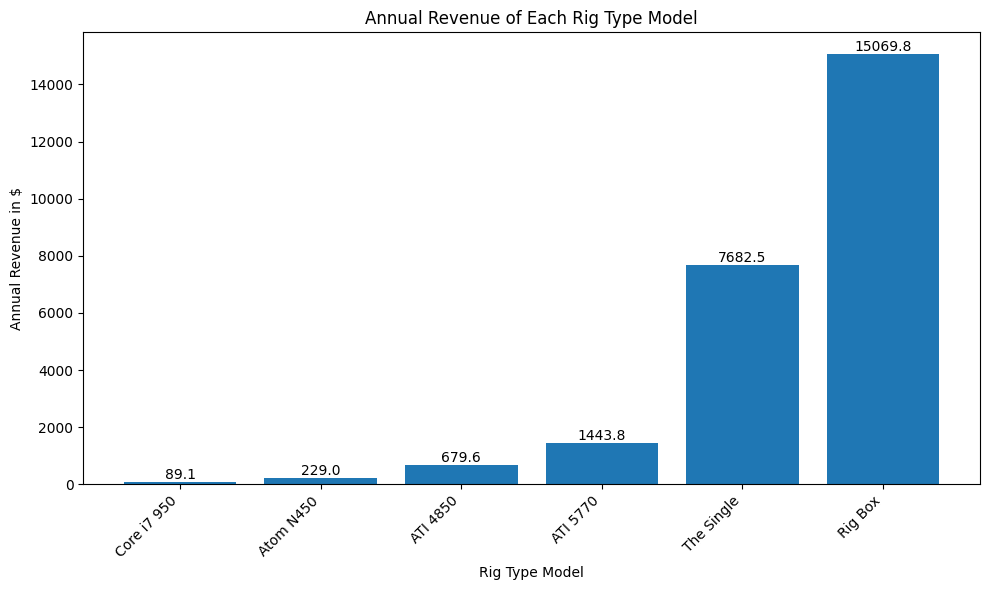

In [32]:
Yearly_revenue_perModel = Yearly_revenue_perModel[Yearly_revenue_perModel['Annual_Sum'] != 0]

# Plot the bar chart with models ordered by Release
plt.figure(figsize=(10, 6))
bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])))
#bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/Capital_Cost_PV)*100, color=colors)

# Set labels and title
plt.xlabel('Rig Type Model')
plt.ylabel('Annual Revenue in $')
plt.title('Annual Revenue of Each Rig Type Model')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom') 

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
